In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data=pd.read_csv('/content/drive/MyDrive/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Exploratory Data Analysis

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Inference: The inference we can derive from the above output is:

Out of 14 features, we have 13 int types and only one with the float data types.</br>
Woah! Fortunately, this dataset doesn’t hold any missing values.</br>
As we are getting some information from each feature so let’s see how statistically the dataset is spread.

In [12]:
data.shape

(303, 14)

Inference: We have a dataset with 303 rows which indicates a smaller set of data.

In [10]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


It is always better to check the correlation between the features so that we can analyze that which feature is negatively correlated and which is positively correlated so, Let’s check the correlation between various features.

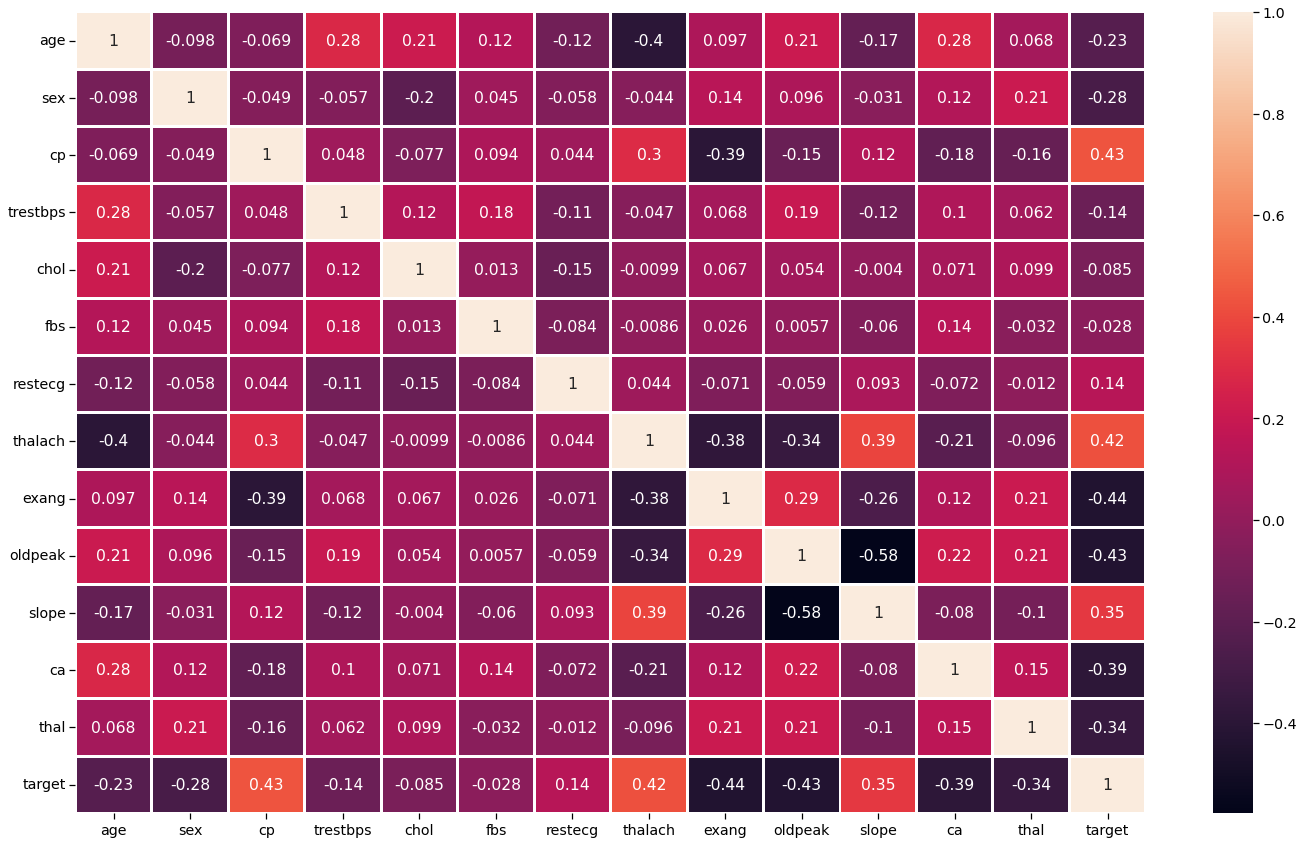

In [14]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale=1.3)
sns.heatmap(data.corr(),annot=True,linewidths=2)
plt.tight_layout()

By far we have checked the correlation between the features but it is also a good practice to check the correlation of the target variable.

So, let’s do this!

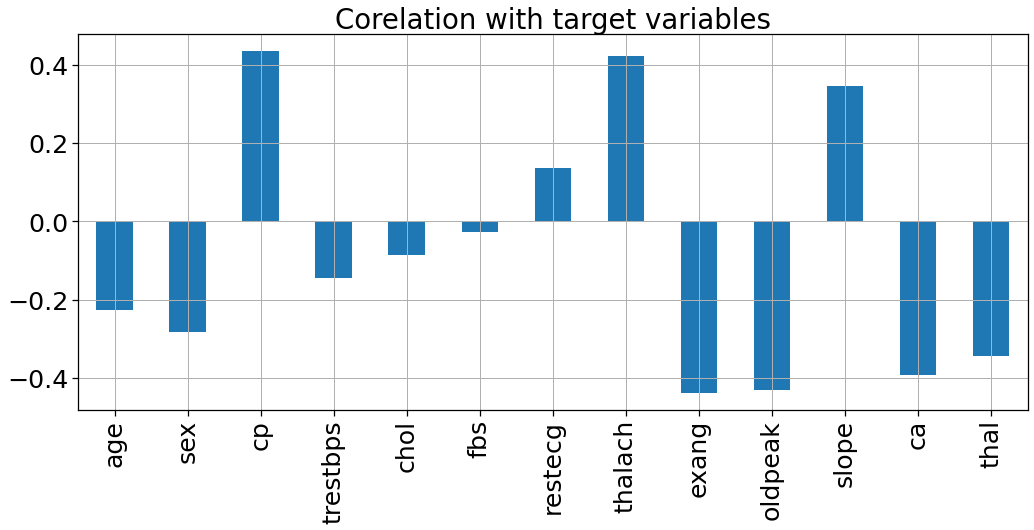

In [21]:
sns.set_context('notebook',font_scale=2.3)
data.drop('target',axis=1).corrwith(data.target).plot(kind='bar',grid=True,figsize=(15,8),title='Corelation with target variables')
plt.tight_layout()

 Insights from the above graph are:</br>

Four feature( “cp”, “restecg”, “thalach”, “slope” ) are positively correlated with the target feature.</br>
Other features are negatively correlated with the target feature.</br>
So, we have done enough collective analysis now let’s go for the analysis of the individual features which comprises both univariate and bivariate analysis.

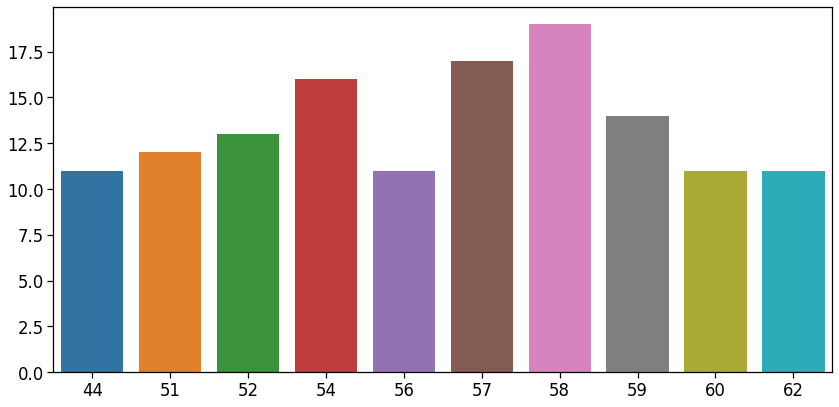

In [28]:
#Here we will be checking the 10 ages and their counts.

plt.figure(figsize=(12,6))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=data.age.value_counts()[:10].index,y=data.age.value_counts()[:10].values)
plt.tight_layout()

 Here we can see that the 58 age column has the highest frequency.

In [29]:
minAge=min(data.age)
maxAge=max(data.age)
meanAge=data.age.mean()
print("Min Age:",minAge)
print("Max Age:",maxAge)
print("Mean Age:",meanAge)

Min Age: 29
Max Age: 77
Mean Age: 54.366336633663366


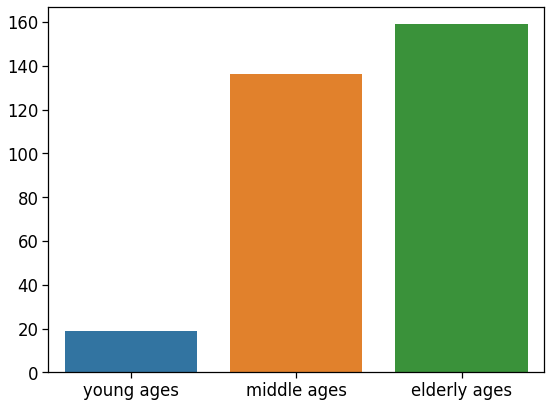

In [37]:
Young=data[(data.age>=29)&(data.age<=40)]
Middle=data[(data.age>=40)&(data.age<=55)]
Elder=data[(data.age>=55)]

plt.figure(figsize=(8,6))
sns.set_context('notebook',font_scale=1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

 Here we can see that elder people are the most affected by heart disease and young ones are the least affected.</br>

To prove the above inference we will plot the pie chart.

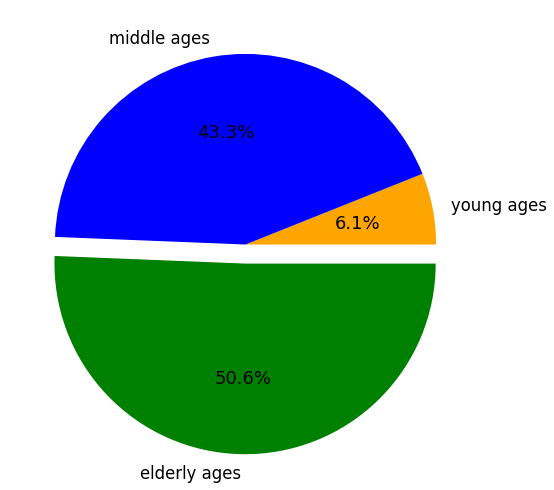

In [48]:
colors=['orange','blue','green']
explode=[0,0,0.1]
labels=['young ages','middle ages','elderly ages']
plt.figure(figsize=(8,8))
sns.set_context('notebook',font_scale=1.5)
plt.pie([len(Young),len(Middle),len(Elder)],labels=labels,explode=explode,colors=colors,autopct='%1.1f%%')
plt.tight_layout()

Sex(“sex”) Feature Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


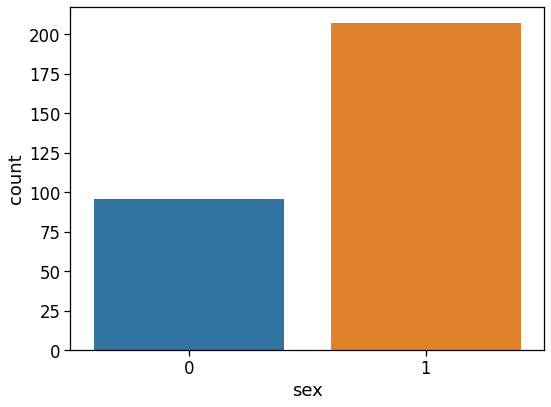

In [53]:
plt.figure(figsize=(8,6))
sns.set_context('notebook',font_scale=1.5)
sns.countplot(data['sex'])
plt.tight_layout()

 Here it is clearly visible that, Ratio of Male to Female is approx 2:1.

Now let’s plot the relation between sex and slope.

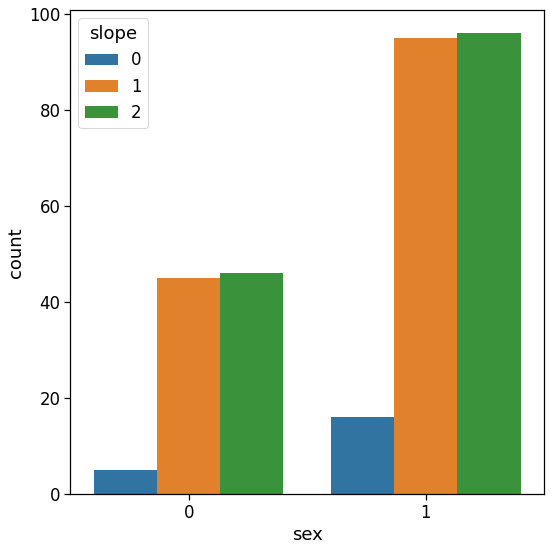

In [60]:
plt.figure(figsize=(8,8))
sns.set_context('notebook',font_scale=1.5)
sns.countplot(x=data['sex'],hue=data["slope"])
plt.tight_layout()

Here it is clearly visible that the slope value is higher in the case of males(1).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


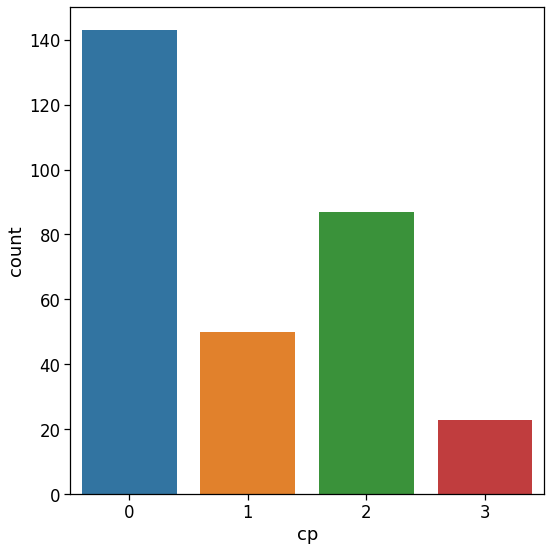

In [62]:
#Chest Pain Type(“cp”) Analysis
plt.figure(figsize=(8,8))
sns.set_context('notebook',font_scale=1.5)
sns.countplot(data['cp'])
plt.tight_layout()

As seen, there are 4 types of chest pain

1-status at least</br>
2-condition slightly distressed</br>
3-condition medium problem</br>
4-condition too bad</br>

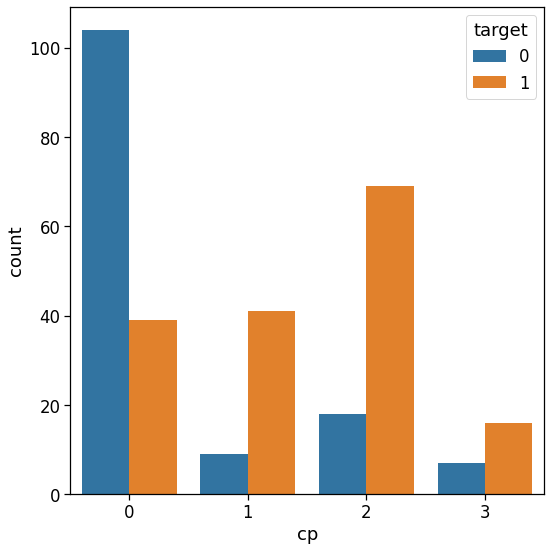

In [65]:
#Analyzing cp vs target column
plt.figure(figsize=(8,8))
sns.set_context('notebook',font_scale=1.5)
sns.countplot(x=data['cp'],hue=data['target'])
plt.tight_layout()

People having the least chest pain are not likely to have heart disease.</br>
People having severe chest pain are likely to have heart disease..</br>
Elderly people are more likely to have chest pain..</br>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


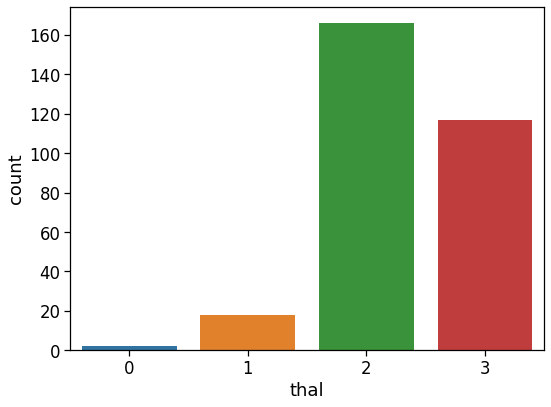

In [68]:
#Thal Analysis
plt.figure(figsize=(8,6))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['thal'])
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


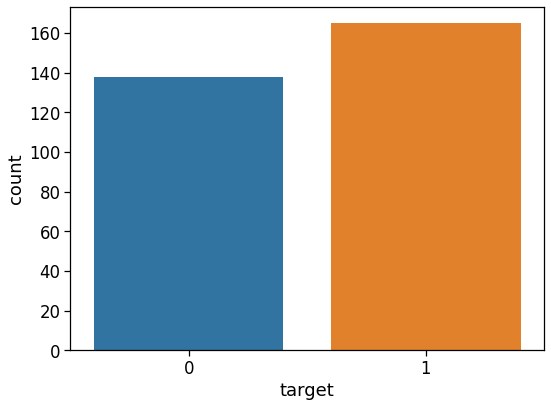

In [70]:
#Target
plt.figure(figsize=(8,6))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['target'])
plt.tight_layout()

The ratio between 1 and 0 is much less than 1.5 which indicates that the target feature is not imbalanced. So for a balanced dataset, we can use accuracy_score as evaluation metrics for our model.

**Feature Engineering**

Now we will see the complete description of the continuous data as well as the categorical data

In [71]:
continuous_val=[]
categorical_val=[]
for column in data.columns:
  print("---------------")
  print(f"{column}:{data[column].unique()}")
  if len(data[column].unique())<=10:
    categorical_val.append(column)
  else:
    continuous_val.append(column)


---------------
age:[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
---------------
sex:[1 0]
---------------
cp:[3 2 1 0]
---------------
trestbps:[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
---------------
chol:[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 2

Now here first we will be removing the target column from our set of features then we will categorize all the categorical variables using the get dummies method which will create a separate column for each category suppose X variable contains 2 types of unique values then it will create 2 different columns for the X variable.

In [72]:
categorical_val.remove('target')
dfs=pd.get_dummies(data,columns=categorical_val)
dfs.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


Now we will be using the standard scaler method to scale down the data so that it won’t raise the outliers also dataset which is scaled to general units leads to having better accuracy.

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
sc=StandardScaler()
col_to_scale=['age','trestbps','chol','thalach','oldpeak']
dfs[col_to_scale]=sc.fit_transform(dfs[col_to_scale])
dfs.head(6)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0
5,0.290464,0.478391,-1.048678,-0.072018,-0.551783,1,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0


**Modeling**</br>
Splitting data sets



In [78]:
X=dfs.drop('target',axis=1)
y=dfs.target

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [84]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8681318681318682


Random Forest

In [95]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

model = XGBClassifier()
param = dict(model_max_depth=[3,5,7], model_learning_rate=[0.001,0.01, 0.1], model_n_estimators=[100,500])

cv = GridSearchCV(model, param_grid=param, cv=10)
cv

GridSearchCV(cv=10, estimator=XGBClassifier(),
             param_grid={'model_learning_rate': [0.001, 0.01, 0.1],
                         'model_max_depth': [3, 5, 7],
                         'model_n_estimators': [100, 500]})

In [96]:
cv.fit(X_train, y_train)
test_pred = cv.predict(X_test)
cv.best_estimator_

XGBClassifier(model_learning_rate=0.001, model_max_depth=3,
              model_n_estimators=100)

In [97]:
max_depth_of_model = cv.best_estimator_.max_depth
best_learning_rate = cv.best_estimator_.learning_rate
best_estimator = cv.best_estimator_.n_estimators
best_reg_lambda = cv.best_estimator_.reg_lambda

model = XGBClassifier(max_depth=max_depth_of_model, learning_rate=best_learning_rate, n_estimators= best_estimator,n_jobs=1,)
model.fit(X_train, y_train)
yhat = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
accuracy_score(yhat,y_test)

0.8351648351648352

In [98]:
importances = model.feature_importances_
importances

array([0.01983939, 0.0238419 , 0.01543427, 0.01559296, 0.03527011,
       0.02470181, 0.        , 0.11005981, 0.01634134, 0.02171328,
       0.0380975 , 0.00858704, 0.        , 0.01403187, 0.01332447,
       0.        , 0.05780988, 0.        , 0.        , 0.08345228,
       0.02985745, 0.07503346, 0.03129089, 0.04394493, 0.0300158 ,
       0.        , 0.        , 0.        , 0.23745677, 0.0543027 ],
      dtype=float32)

In [99]:
inducies = np.argsort(importances)[::-1]
inducies

array([28,  7, 19, 21, 16, 29, 23, 10,  4, 22, 24, 20,  5,  1,  9,  0,  8,
        3,  2, 13, 14, 11, 12, 15, 17, 18,  6, 25, 26, 27])

In [101]:
feature_dict = dict()
for idx in inducies:
    feature_dict[list(dfs.drop("target",1).columns)[idx]] = float(importances[idx])
feature_dict

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


{'age': 0.019839394837617874,
 'ca_0': 0.07503345608711243,
 'ca_1': 0.03129088506102562,
 'ca_2': 0.04394493252038956,
 'ca_3': 0.030015800148248672,
 'ca_4': 0.0,
 'chol': 0.015434268862009048,
 'cp_0': 0.11005980521440506,
 'cp_1': 0.01634134165942669,
 'cp_2': 0.02171327732503414,
 'cp_3': 0.03809749707579613,
 'exang_0': 0.05780988186597824,
 'exang_1': 0.0,
 'fbs_0': 0.008587043732404709,
 'fbs_1': 0.0,
 'oldpeak': 0.03527010977268219,
 'restecg_0': 0.01403187308460474,
 'restecg_1': 0.013324473053216934,
 'restecg_2': 0.0,
 'sex_0': 0.024701813235878944,
 'sex_1': 0.0,
 'slope_0': 0.0,
 'slope_1': 0.08345227688550949,
 'slope_2': 0.029857445508241653,
 'thal_0': 0.0,
 'thal_1': 0.0,
 'thal_2': 0.2374567687511444,
 'thal_3': 0.05430269613862038,
 'thalach': 0.015592964366078377,
 'trestbps': 0.02384190261363983}

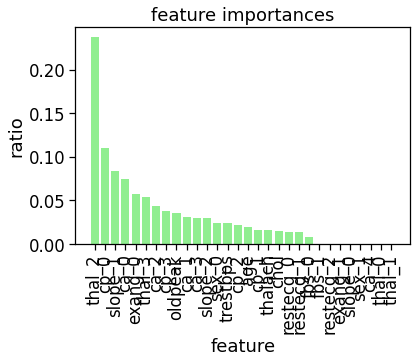

In [102]:
y_pos = np.arange(len(feature_dict.keys()))
plt.bar(y_pos, list(feature_dict.values()), align = "center",color = "lightgreen")
plt.xticks(y_pos, list(feature_dict.keys()), rotation = 90)
plt.xlabel("feature")
plt.ylabel("ratio")
plt.title("feature importances")
plt.show()